# Customer_Behaviour_Analysis

## Problem Statement:

- This dataset has the purchases of a customer across different timescales and shopping baskets.
- Here I'm trying to analyse it to profile the individual and identify key characteristics.


## Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset :

In [2]:
data=pd.read_excel("Data Analyst Task.xlsx")

In [3]:
data.head()

,Purchase__basketValueGross,Purchase__purchaseType,Purchase__overallBasketSavings,Purchase__storeId,Purchase__paymentType__category,Purchase__paymentType__amount,Purchase__timeStamp,Purchase__basketValueNet,Purchase__says,Purchase__storeName,Purchase__storeFormat,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
0,79.03,IN_STORE,3.17,3189.0,NaN,75.86,2021-10-30 18:37:36.766,75.86,NaN,SOUTHWARK,SuperStore,Koko Dairy Free Unsweetened Alternative Longli...,5.0,IN_STORE,1.50
1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Tesco Bunched Spring Onions 100G,1.0,IN_STORE,0.37
2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Tesco Finest Cheesecake Passion Fruit & Raspbe...,1.0,IN_STORE,4.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Tesco Mixed Sized Organic Eggs 6 Pack,1.0,IN_STORE,1.80
4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Vanish Pet Expert Carpet Care Foam 600Ml,1.0,IN_STORE,6.00


In [4]:
# Columns of the dataset:
for col in data.columns:
    print(col)

Purchase__basketValueGross
Purchase__purchaseType
Purchase__overallBasketSavings
Purchase__storeId
Purchase__paymentType__category
Purchase__paymentType__amount
Purchase__timeStamp
Purchase__basketValueNet
Purchase__says
Purchase__storeName
Purchase__storeFormat
Purchase__product__name
Purchase__product__quantity
Purchase__product__channel
Purchase__product__price


In [5]:
data.shape

(444, 15)

## Data Preprocessing :

In [6]:
# Checking for Duplicates :
data.duplicated().sum()

98

In [7]:
# Removing duplicate entries :
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
data.shape

(346, 15)

In [9]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Purchase__basketValueGross,Purchase__purchaseType,Purchase__overallBasketSavings,Purchase__storeId,Purchase__paymentType__category,Purchase__paymentType__amount,Purchase__timeStamp,Purchase__basketValueNet,Purchase__says,Purchase__storeName,Purchase__storeFormat,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
Null values,302.000000,303.000000,317.000000,303.000000,346.0,303.000000,303.000000,303.000000,346.0,303.000000,303.000000,1.000000,1.000000,1.000000,1.000000
% Null values,87.283237,87.572254,91.618497,87.572254,100.0,87.572254,87.572254,87.572254,100.0,87.572254,87.572254,0.289017,0.289017,0.289017,0.289017


Here we can obseve the % of Null values for initial 11 columns. It all has maximum of NaN values. So it will be better to drop these.

Max null columns:

- Purchase__basketValueGross
- Purchase__purchaseType
- Purchase__overallBasketSavings
- Purchase__storeId
- Purchase__paymentType__category
- Purchase__paymentType__amount
- Purchase__timeStamp
- Purchase__basketValueNet
- Purchase__says
- Purchase__storeName
- Purchase__storeFormat

In [10]:
data.drop(['Purchase__basketValueGross','Purchase__purchaseType','Purchase__overallBasketSavings','Purchase__storeId','Purchase__paymentType__category','Purchase__paymentType__amount','Purchase__timeStamp','Purchase__basketValueNet','Purchase__says','Purchase__storeName','Purchase__storeFormat'],axis=1, inplace=True)

In [11]:
data.head()

,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
0,Koko Dairy Free Unsweetened Alternative Longli...,5.0,IN_STORE,1.50
1,Tesco Bunched Spring Onions 100G,1.0,IN_STORE,0.37
2,Tesco Finest Cheesecake Passion Fruit & Raspbe...,1.0,IN_STORE,4.00
3,Tesco Mixed Sized Organic Eggs 6 Pack,1.0,IN_STORE,1.80
4,Vanish Pet Expert Carpet Care Foam 600Ml,1.0,IN_STORE,6.00


In [12]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
Null values,1.000000,1.000000,1.000000,1.000000
% Null values,0.289017,0.289017,0.289017,0.289017


In [13]:
data.dropna(axis=0, subset = ['Purchase__product__name'], inplace=True)

In [14]:
# Checking for null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = info.append(pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'}))
info

,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
Null values,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0


In [15]:
print(data.shape)
data.head()

(345, 4)


,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price
0,Koko Dairy Free Unsweetened Alternative Longli...,5.0,IN_STORE,1.50
1,Tesco Bunched Spring Onions 100G,1.0,IN_STORE,0.37
2,Tesco Finest Cheesecake Passion Fruit & Raspbe...,1.0,IN_STORE,4.00
3,Tesco Mixed Sized Organic Eggs 6 Pack,1.0,IN_STORE,1.80
4,Vanish Pet Expert Carpet Care Foam 600Ml,1.0,IN_STORE,6.00


In [16]:
backup_cleaned_data=data.copy()

In [17]:
data['Company']=data['Purchase__product__name'].str.split(" ").str.slice(0,1).str.join(' ')
data.head()

,Purchase__product__name,Purchase__product__quantity,Purchase__product__channel,Purchase__product__price,Company
0,Koko Dairy Free Unsweetened Alternative Longli...,5.0,IN_STORE,1.50,Koko
1,Tesco Bunched Spring Onions 100G,1.0,IN_STORE,0.37,Tesco
2,Tesco Finest Cheesecake Passion Fruit & Raspbe...,1.0,IN_STORE,4.00,Tesco
3,Tesco Mixed Sized Organic Eggs 6 Pack,1.0,IN_STORE,1.80,Tesco
4,Vanish Pet Expert Carpet Care Foam 600Ml,1.0,IN_STORE,6.00,Vanish


## Exploratory Data Analysis :

<AxesSubplot:xlabel='Purchase__product__quantity', ylabel='count'>

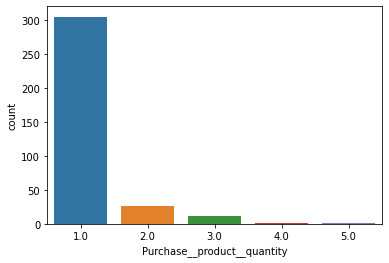

In [18]:
sns.countplot(data['Purchase__product__quantity'])

<AxesSubplot:xlabel='Purchase__product__price', ylabel='count'>

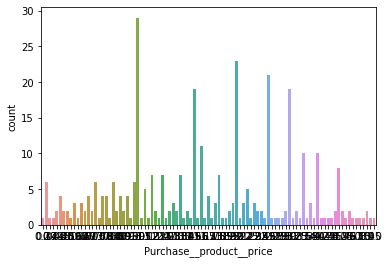

In [19]:
sns.countplot(data['Purchase__product__price'])

In [20]:
data['Company'].unique()

array(['Koko', 'Tesco', 'Vanish', 'Gressingham', 'Highland', 'Finest',
       'Kikkoman', 'T.Kent', 'Good', 'Califia', 'Little', 'Thorntons',
       'Bahlsen', 'Nivea', 'Swizzels', 'Galaxy', 'Klc', 'Cadbury',
       'Jaffa', 'Mowi', 'Twinings', "Twining's", 'Falfish', 'Fresh',
       'Total', 'Haribo', 'Alpro', 'Linda', 'Mancave', 'Method', 'Buxton',
       'Glade', 'Princes', 'UNLEADED', 'Off', 'Botanica', 'Willow',
       'Malcolm', 'Grahams', 'Bells', 'Mackies', 'Galbani', 'Simon',
       'Counter', 'Nightingale', 'Mothers', 'Rosedene', 'Mackie',
       'T.Ready', 'Kettle', 'Nescafe', 'Rr', 'Kleinkaroo', 'Deli',
       'Happy', 'The', 'Tarbert', 'Gu', 'Sunpat', 'T.Ripe', 'Buckwud',
       'Perfectly', 'Lavazza', 'Suntrail', 'Ecover', 'Hoads', 'Pedigree',
       'Yamas', 'Green', 'Cirio', 'Kingfisher', 'Alberto', 'Rocket',
       'San', 'Pot', 'Light', 'Graze', 'Philadelphia', 'Arla',
       'Batchelors', 'Nongshim', 'Thai', 'Birds', 'Mccain', 'Oatly',
       'Schwartz', 'Korean', 'B

<AxesSubplot:xlabel='Company', ylabel='count'>

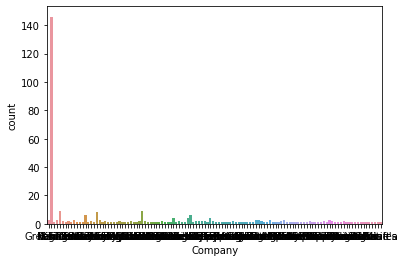

In [21]:
sns.countplot(data['Company'])

In [22]:
data['Company'].value_counts()

Tesco       146
Highland      9
UNLEADED      9
Cadbury       8
Nescafe       6
           ... 
Bell's        1
Falfish       1
Total         1
T.Ready       1
Glade         1
Name: Company, Length: 118, dtype: int64

# Observation:

- The customer is more interested in buying Tesco company products.
- It would be better to suggest him more different products of Tesco
- So that he can buy it more.